<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(population.shape[0]))
print("Le tableau comporte {} colonnes".format(population.shape[1]))

Le tableau comporte 1416 articles
Le tableau comporte 3 colonnes


In [4]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(population.shape[1]))

#La nature des données dans chacune des colonnes
types_de_donnees = population.dtypes

# population.info()
print('le type de données dans chaque colonnes:', types_de_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
nombre_de_valeurs_par_colonne = population.count()
print('Le nombre de valeurs présentes dans chacune des colonnes:',nombre_de_valeurs_par_colonne)


Le tableau comporte 3 colonnes
le type de données dans chaque colonnes: Zone       object
Année       int64
Valeur    float64
dtype: object
Le nombre de valeurs présentes dans chacune des colonnes: Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table

population.head()

Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113

In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population["Valeur"] = population["Valeur"] * 1000
population.head()

Zone  Année      Valeur
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={"Valeur": "Population"}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 articles
Le tableau comporte 18 colonnes


In [10]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(dispo_alimentaire.shape[1]))

Le tableau comporte 18 colonnes


In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                                NaN               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                                NaN          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                      53.0                      NaN                      NaN   
1                      41.0                      2.0                     40.0   
2                       2.0                      NaN                      2.0   
3                       0.0                      NaN                      0.0   
4                      82.0                      NaN                     82.0   

   Nourriture  Pertes  Production  Semences  Traitement  Variation de stock  
0        53.0     NaN        53.0       NaN         NaN                 NaN  
1        39.0     2.0         3.0       NaN         NaN                 NaN  
2         2.0     NaN         NaN       NaN         NaN                 NaN  
3         0.0     NaN         NaN       NaN         NaN                 NaN  
4        82.0     NaN         NaN       NaN         NaN                 NaN

In [12]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
#dispo_alimentaire = dispo_alimentaire.mul(1000000)
dispo_alimentaire[["Aliments pour animaux","Disponibilité intérieure","Exportations - Quantité","Importations - Quantité","Nourriture","Pertes","Production","Semences","Traitement","Variation de stock"]]*=1000000
dispo_alimentaire.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                                NaN               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                                NaN          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                53000000.0                      NaN                      NaN   
1                41000000.0                2000000.0               40000000.0   
2                 2000000.0                      NaN                2000000.0   
3                       0.0                      NaN                      0.0   
4                82000000.0                      NaN               82000000.0   

   Nourriture     Pertes  Production  Semences  Traitement  Variation de stock  
0  53000000.0        NaN  53000000.0       NaN         NaN                 NaN  
1  39000000.0  2000000.0   3000000.0       NaN         NaN                 NaN  
2   2000000.0        NaN         NaN       NaN         NaN                 NaN  
3         0.0        NaN         NaN       NaN         NaN                 NaN  
4  82000000.0        NaN         NaN       NaN         NaN                 NaN

In [13]:
#remplacement des NaN dans le dataset par des 0

dispo_alimentaire.fillna(0,inplace=True)
dispo_alimentaire.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                               0.00               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                               0.00          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                53000000.0                      0.0                      0.0   
1                41000000.0                2000000.0               40000000.0   
2                 2000000.0                      0.0                2000000.0   
3                       0.0                      0.0                      0.0   
4                82000000.0                      0.0               82000000.0   

   Nourriture     Pertes  Production  Semences  Traitement  Variation de stock  
0  53000000.0        0.0  53000000.0       0.0         0.0                 0.0  
1  39000000.0  2000000.0   3000000.0       0.0         0.0                 0.0  
2   2000000.0        0.0         0.0       0.0         0.0                 0.0  
3         0.0        0.0         0.0       0.0         0.0                 0.0  
4  82000000.0        0.0         0.0       0.0         0.0                 0.0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                                               1.29        
2                                               0.06        
3                                               0.00        
4                                               2.70        

   Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                               0.20               
1                                               0.01               
2                                               0.01               
3                                               0.00               
4                                               0.02               

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.77          
1                                               0.02          
2                                               0.03          
3                                               0.00          
4                                               0.05          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                53000000.0                      0.0                      0.0   
1                41000000.0                2000000.0               40000000.0   
2                 2000000.0                      0.0                2000000.0   
3                       0.0                      0.0                      0.0   
4                82000000.0                      0.0               82000000.0   

   Nourriture     Pertes  Production  Semences  Traitement  Variation de stock  
0  53000000.0        0.0  53000000.0       0.0         0.0                 0.0  
1  39000000.0  2000000.0   3000000.0       0.0         0.0                 0.0  
2   2000000.0        0.0         0.0       0.0         0.0                 0.0  
3         0.0        0.0         0.0       0.0         0.0                 0.0  
4  82000000.0        0.0         0.0       0.0         0.0                 0.0

In [15]:
# Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(aide_alimentaire.shape[0])) 
print("Le tableau comporte {} colonnes".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 articles
Le tableau comporte 4 colonnes


In [16]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(aide_alimentaire.shape[1]))

Le tableau comporte 4 colonnes


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504

In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)
aide_alimentaire.head()

Zone  Année              Produit  Valeur
0  Afghanistan   2013  Autres non-céréales     682
1  Afghanistan   2014  Autres non-céréales     335
2  Afghanistan   2013         Blé et Farin   39224
3  Afghanistan   2014         Blé et Farin   15160
4  Afghanistan   2013             Céréales   40504

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Valeur"] = aide_alimentaire["Valeur"] * 1000
aide_alimentaire.head()

Zone  Année              Produit    Valeur
0  Afghanistan   2013  Autres non-céréales    682000
1  Afghanistan   2014  Autres non-céréales    335000
2  Afghanistan   2013         Blé et Farin  39224000
3  Afghanistan   2014         Blé et Farin  15160000
4  Afghanistan   2013             Céréales  40504000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

Zone  Année              Produit    Valeur
0  Afghanistan   2013  Autres non-céréales    682000
1  Afghanistan   2014  Autres non-céréales    335000
2  Afghanistan   2013         Blé et Farin  39224000
3  Afghanistan   2014         Blé et Farin  15160000
4  Afghanistan   2013             Céréales  40504000

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} articles".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonnes".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 articles
Le tableau comporte 3 colonnes


In [22]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonnes".format(sous_nutrition.shape[1]))

Le tableau comporte 3 colonnes


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5

In [24]:
#Conversion de la colonne sous nutrition en numérique

sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

ValueError: Unable to parse string "<0.1" at position 60

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition['Valeur'].fillna(0, inplace=True)


In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={"Valeur": "sous_nutrition"}, inplace=True)
sous_nutrition.head()

Zone      Année  sous_nutrition
0  Afghanistan  2012-2014             8.6
1  Afghanistan  2013-2015             8.8
2  Afghanistan  2014-2016             8.9
3  Afghanistan  2015-2017             9.7
4  Afghanistan  2016-2018            10.5

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"] * 1000000


In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

Zone      Année  sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

population_sous_nutrition_2017 = pd.merge(population[population['Année'] == 2017], 
                                          sous_nutrition[sous_nutrition['Année'] == '2016-2018'],
                                          on='Zone')


In [30]:
#Affichage du dataset
population_sous_nutrition_2017

Zone  Année_x  Population    Année_y  \
0                               Afghanistan     2017  36296113.0  2016-2018   
1                            Afrique du Sud     2017  57009756.0  2016-2018   
2                                   Albanie     2017   2884169.0  2016-2018   
3                                   Algérie     2017  41389189.0  2016-2018   
4                                 Allemagne     2017  82658409.0  2016-2018   
..                                      ...      ...         ...        ...   
198  Venezuela (République bolivarienne du)     2017  29402484.0  2016-2018   
199                                Viet Nam     2017  94600648.0  2016-2018   
200                                   Yémen     2017  27834819.0  2016-2018   
201                                  Zambie     2017  16853599.0  2016-2018   
202                                Zimbabwe     2017  14236595.0  2016-2018   

     sous_nutrition  
0        10500000.0  
1         3100000.0  
2          100000.0  
3         1300000.0  
4               0.0  
..              ...  
198       8000000.0  
199       6500000.0  
200             0.0  
201             0.0  
202             0.0  

[203 rows x 5 columns]

In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

pop_mond =  population_sous_nutrition_2017['Population'].sum() 
pourcentage= population_sous_nutrition_2017['sous_nutrition'].sum()  / pop_mond *100
print('La population mondiale: {:.0f}'.format(pop_mond))
print('Le pourcentage {:.2f} %'.format(pourcentage))

La population mondiale: 7543798779
Le pourcentage 7.10 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? Source => 

print("{} kcal d'après la source FAO.".format(2500))

2500 kcal d'après la source FAO.


In [33]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_dispo_alimentaire = pd.merge(population.loc[population['Année']==2017,['Zone', 'Population']], dispo_alimentaire, on='Zone')


In [34]:
#Affichage du nouveau dataframe
population_dispo_alimentaire

Zone  Population                Produit   Origine  \
0      Afghanistan  36296113.0       Abats Comestible   animale   
1      Afghanistan  36296113.0        Agrumes, Autres  vegetale   
2      Afghanistan  36296113.0  Aliments pour enfants  vegetale   
3      Afghanistan  36296113.0                 Ananas  vegetale   
4      Afghanistan  36296113.0                Bananes  vegetale   
...            ...         ...                    ...       ...   
15411     Zimbabwe  14236595.0       Viande de Suides   animale   
15412     Zimbabwe  14236595.0    Viande de Volailles   animale   
15413     Zimbabwe  14236595.0          Viande, Autre   animale   
15414     Zimbabwe  14236595.0                    Vin  vegetale   
15415     Zimbabwe  14236595.0         Épices, Autres  vegetale   

       Aliments pour animaux  Autres Utilisations  \
0                        0.0                  0.0   
1                        0.0                  0.0   
2                        0.0                  0.0   
3                        0.0                  0.0   
4                        0.0                  0.0   
...                      ...                  ...   
15411                    0.0                  0.0   
15412                    0.0                  0.0   
15413                    0.0                  1.0   
15414                    0.0                  0.0   
15415                    0.0                  0.0   

       Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                 5.0   
1                                                 1.0   
2                                                 1.0   
3                                                 0.0   
4                                                 4.0   
...                                               ...   
15411                                            24.0   
15412                                            17.0   
15413                                             7.0   
15414                                             1.0   
15415                                             1.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                   1.72        
1                                                   1.29        
2                                                   0.06        
3                                                   0.00        
4                                                   2.70        
...                                                  ...        
15411                                               2.65        
15412                                               4.97        
15413                                               2.29        
15414                                               0.27        
15415                                               0.06        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                   0.20               
1                                                   0.01               
2                                                   0.01               
3                                                   0.00               
4                                                   0.02               
...                                                  ...               
15411                                               2.25               
15412                                               1.05               
15413                                               0.21               
15414                                               0.00               
15415                                               0.02               

       Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                   0.77          
1                                                   0.02          
2                                       

In [35]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
population_dispo_alimentaire['dispo_kcal'] = population_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] * population_dispo_alimentaire['Population']

# Somme des kcal disponibles pour chaque zone/pays pour obtenir les kcal disponibles mondialement
kcal_disponibles_mondialement = population_dispo_alimentaire['dispo_kcal'].sum()

# Afficher les kcal disponibles mondialement
print("Kcal disponibles mondialement :", kcal_disponibles_mondialement)



Kcal disponibles mondialement : 20918984627331.0


In [36]:
#Calcul du nombre d'humains pouvant être nourris

nb_hum=kcal_disponibles_mondialement/2500
print("Nombre total d'humains pouvant être nourris est de {:.0f}".format(nb_hum))

# Remplacer les valeurs nulles par 0 dans la colonne 'Nourriture'
population_dispo_alimentaire['Nourriture'] = population_dispo_alimentaire['Nourriture'].fillna(0)

pop2017= population.loc[population['Année']==2017,['Zone', 'Population']]
pop2017=pop2017['Population'].sum()

print('La proportion nombre d humains pouvant être nourris est de {:.2f} %'.format(nb_hum/pop2017*100))


Nombre total d'humains pouvant être nourris est de 8367593851
La proportion nombre d humains pouvant être nourris est de 110.86 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [37]:
#Transfert des données avec les végétaux dans un nouveau dataframe

#population_dispo_alimentaire_vegetaux= np.where(population_dispo_alimentaire['Origine'] == vegetal, 
population_dispo_alimentaire_vegetaux = population_dispo_alimentaire.loc[population_dispo_alimentaire['Origine'] == 'vegetale']
population_dispo_alimentaire_vegetaux                                         

Zone  Population                Produit   Origine  \
1      Afghanistan  36296113.0        Agrumes, Autres  vegetale   
2      Afghanistan  36296113.0  Aliments pour enfants  vegetale   
3      Afghanistan  36296113.0                 Ananas  vegetale   
4      Afghanistan  36296113.0                Bananes  vegetale   
6      Afghanistan  36296113.0                  Bière  vegetale   
...            ...         ...                    ...       ...   
15406     Zimbabwe  14236595.0                 Sésame  vegetale   
15407     Zimbabwe  14236595.0                    Thé  vegetale   
15408     Zimbabwe  14236595.0                Tomates  vegetale   
15414     Zimbabwe  14236595.0                    Vin  vegetale   
15415     Zimbabwe  14236595.0         Épices, Autres  vegetale   

       Aliments pour animaux  Autres Utilisations  \
1                        0.0                  0.0   
2                        0.0                  0.0   
3                        0.0                  0.0   
4                        0.0                  0.0   
6                        0.0                  0.0   
...                      ...                  ...   
15406                    0.0                  0.0   
15407                    0.0                  0.0   
15408                    0.0                  0.0   
15414                    0.0                  0.0   
15415                    0.0                  0.0   

       Disponibilité alimentaire (Kcal/personne/jour)  \
1                                                 1.0   
2                                                 1.0   
3                                                 0.0   
4                                                 4.0   
6                                                 0.0   
...                                               ...   
15406                                             0.0   
15407                                             1.0   
15408                                             1.0   
15414                                             1.0   
15415                                             1.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
1                                                   1.29        
2                                                   0.06        
3                                                   0.00        
4                                                   2.70        
6                                                   0.09        
...                                                  ...        
15406                                               0.00        
15407                                               0.54        
15408                                               1.80        
15414                                               0.27        
15415                                               0.06        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
1                                                   0.01               
2                                                   0.01               
3                                                   0.00               
4                                                   0.02               
6                                                   0.00               
...                                                  ...               
15406                                               0.00               
15407                                               0.00               
15408                                               0.01               
15414                                               0.00               
15415                                               0.02               

       Disponibilité de protéines en quantité (g/personne/jour)  \
1                                                   0.02          
2                                                   0.03          
3                                       

In [38]:
#Calcul du nombre de kcal disponible pour les végétaux
nombre_kcal_total = population_dispo_alimentaire_vegetaux['dispo_kcal'].sum()
print('Nombre de kcal disponible pour les végétaux: ',nombre_kcal_total)

Nombre de kcal disponible pour les végétaux:  17260764211501.0


In [39]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nombre_humains_total_vegetaux = nombre_kcal_total/2500
print('Le nombre d humains pouvant être nourris avec les végétaux {:.0f}'.format(nombre_humains_total_vegetaux))
nombre_humains_total_vegetaux/pop2017*100
print('La proportion nombre d humains pouvant être nourris est de {:.2f} %'.format(nombre_humains_total_vegetaux/pop2017*100))


Le nombre d humains pouvant être nourris avec les végétaux 6904305685
La proportion nombre d humains pouvant être nourris est de 91.47 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [40]:
#Calcul de la disponibilité totale
dispo_int = population_dispo_alimentaire['Disponibilité intérieure'].sum()

print('la disponibilité totale est de ',dispo_int)

la disponibilité totale est de  9733927000000.0


Aliments pour animaux: 13.23%
Pertes: 4.65%
Nourriture: 49.37%
Semences: 1.58%
Traitement: 22.45%


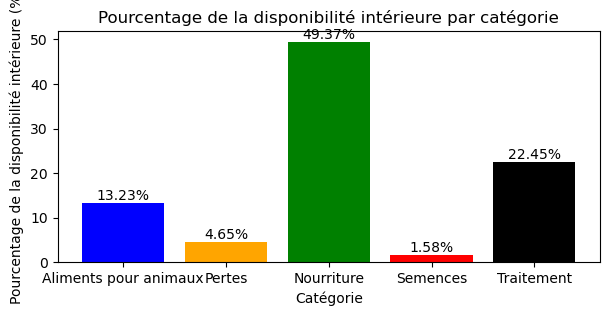

In [41]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
# Colonnes à afficher
colonnes_a_afficher = ["Aliments pour animaux", "Pertes", "Nourriture","Semences","Traitement"]

# Listes pour stocker les pourcentages
pourcentages = []

# Boucle pour afficher les valeurs des colonnes spécifiées
    
for column in colonnes_a_afficher:
    pourcentage = population_dispo_alimentaire[column].sum() / dispo_int * 100
    pourcentages.append(pourcentage)
    
    # Affichage des pourcentages
    print(f"{column}: {pourcentage:.2f}%")  
    
# Création du graphique en dehors de la boucle
plt.figure(figsize=(7, 3))
plt.bar(colonnes_a_afficher, pourcentages, color=['blue', 'orange', 'green','red', 'black'])
plt.title('Pourcentage de la disponibilité intérieure par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage de la disponibilité intérieure (%)')

# Ajout des pourcentages sur le graphique
for i in range(len(colonnes_a_afficher)):
    plt.text(i, pourcentages[i], f"{pourcentages[i]:.2f}%", ha='center', va='bottom')
    
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [42]:
#Création d'une liste avec toutes les variables
cereales = ["Avoine","Blé","Orge","Seigle","Millet","Riz (Eq Blanchi)","Maïs","Sorgho","Céréales, Autres"]


In [43]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

df_cereales = dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(cereales),:]
df_cereales

Zone           Produit   Origine  Aliments pour animaux  \
7       Afghanistan               Blé  vegetale                    0.0   
12      Afghanistan  Céréales, Autres  vegetale                    0.0   
32      Afghanistan              Maïs  vegetale            200000000.0   
34      Afghanistan            Millet  vegetale                    0.0   
40      Afghanistan              Orge  vegetale            360000000.0   
...             ...               ...       ...                    ...   
15545  Îles Salomon  Céréales, Autres  vegetale                    0.0   
15568  Îles Salomon              Maïs  vegetale                    0.0   
15575  Îles Salomon              Orge  vegetale                    0.0   
15591  Îles Salomon  Riz (Eq Blanchi)  vegetale                    0.0   
15593  Îles Salomon            Sorgho  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
7                      0.0                                          1369.0   
12                     0.0                                             0.0   
32                     0.0                                            21.0   
34                     0.0                                             3.0   
40                     0.0                                            26.0   
...                    ...                                             ...   
15545                  0.0                                             0.0   
15568                  0.0                                             1.0   
15575                  0.0                                             0.0   
15591                 12.0                                           623.0   
15593                  0.0                                             0.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
7                                                 160.23        
12                                                  0.00        
32                                                  2.50        
34                                                  0.40        
40                                                  2.92        
...                                                  ...        
15545                                               0.00        
15568                                               0.15        
15575                                               0.07        
15591                                              63.76        
15593                                               0.00        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
7                                                   4.69               
12                                                  0.00               
32                                                  0.30               
34                                                  0.02               
40                                                  0.24               
...                                                  ...               
15545                                               0.00               
15568                                               0.01               
15575                                               0.00               
15591                                               1.36               
15593                                               0.00               

       Disponibilité de protéines en quantité (g/personne/jour)  \
7                                                  36.91          
12                                                  0.00          
32                                                  0.56          
34                                                  0.08          
40                                                  0.79          
...                                                  ...          
15545                                               0.00          
15568  

In [44]:
#Affichage de la proportion d'alimentation animale
prop_animale = df_cereales["Aliments pour animaux"].sum()*100/ df_cereales["Disponibilité intérieure"].sum()

print('La proportion alimentation animale est de {:.2f} %'.format(prop_animale))

La proportion alimentation animale est de 36.29 %


In [45]:
#Affichage de la proportion d'alimentation humaines
prop_humaine = (df_cereales["Nourriture"].sum()*100/ df_cereales["Disponibilité intérieure"].sum())

print('La proportion alimentation humaine est de {:.2f} %'.format(prop_humaine))

La proportion alimentation humaine est de 42.75 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [46]:
#Création de la colonne proportion par pays

population_sous_nutrition_2017['taux'] = population_sous_nutrition_2017['sous_nutrition']*100/population_sous_nutrition_2017['Population']

population_sous_nutrition_2017[['Zone','taux']].sort_values(by='taux',ascending=False).head(10)

Zone       taux
78                                        Haïti  48.259182
157  République populaire démocratique de Corée  47.188685
108                                  Madagascar  41.062924
103                                     Libéria  38.279742
100                                     Lesotho  38.249438
183                                       Tchad  37.957606
161                                      Rwanda  35.055619
121                                  Mozambique  32.810898
186                                 Timor-Leste  32.173531
0                                   Afghanistan  28.928718

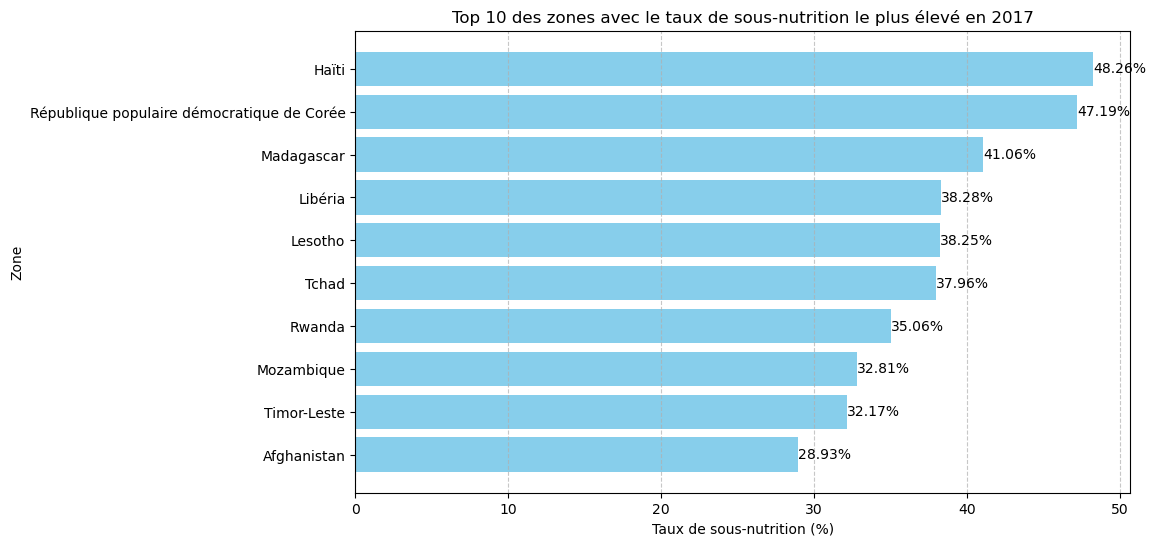

In [47]:
# Graphiqie : Top 10 des zones avec le taux de sous-nutrition le plus élevé en 2017

# Calculer le taux de sous-nutrition
population_sous_nutrition_2017['taux'] = population_sous_nutrition_2017['sous_nutrition'] * 100 / population_sous_nutrition_2017['Population']

# Trier et sélectionner les 10 zones avec le taux de sous-nutrition le plus élevé
top10_zones = population_sous_nutrition_2017[['Zone', 'taux']].sort_values(by='taux', ascending=False).head(10)

# Affichage des résultats en graphique
plt.figure(figsize=(10, 6))
plt.barh(top10_zones['Zone'], top10_zones['taux'], color='skyblue')
plt.xlabel('Taux de sous-nutrition (%)')
plt.ylabel('Zone')
plt.title('Top 10 des zones avec le taux de sous-nutrition le plus élevé en 2017')
plt.gca().invert_yaxis()  # Inversion de l'axe Y pour avoir la zone avec le taux le plus élevé en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i in range(len(top10_zones)):
    plt.text(top10_zones['taux'].iloc[i], i, f'{top10_zones["taux"].iloc[i]:.2f}%', ha='left', va='center')

plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [48]:
#calcul du total de l'aide alimentaire par pays

total_aide_par_pays = aide_alimentaire.groupby("Zone")["Valeur"].sum().reset_index()

total_aide_par_pays

Zone      Valeur
0   Afghanistan   185452000
1       Algérie    81114000
2        Angola     5014000
3    Bangladesh   348188000
4       Bhoutan     2666000
..          ...         ...
71       Zambie     3026000
72     Zimbabwe    62570000
73       Égypte     1122000
74     Équateur     1362000
75     Éthiopie  1381294000

[76 rows x 2 columns]

In [49]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
pays_beneficie_plus = total_aide_par_pays.sort_values(by='Valeur', ascending=False)
pays_beneficie_plus.head(10)

Zone      Valeur
50         République arabe syrienne  1858943000
75                          Éthiopie  1381294000
70                             Yémen  1206484000
61                     Soudan du Sud   695248000
60                            Soudan   669784000
30                             Kenya   552836000
3                         Bangladesh   348188000
59                           Somalie   292678000
53  République démocratique du Congo   288502000
43                             Niger   276344000

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [50]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_ali = aide_alimentaire[['Zone','Année','Valeur']]
aide_ali=aide_ali.groupby(['Zone','Année']).sum().reset_index()
aide_ali

Zone  Année     Valeur
0    Afghanistan   2013  128238000
1    Afghanistan   2014   57214000
2        Algérie   2013   35234000
3        Algérie   2014   18980000
4        Algérie   2015   17424000
..           ...    ...        ...
223       Égypte   2013    1122000
224     Équateur   2013    1362000
225     Éthiopie   2013  591404000
226     Éthiopie   2014  586624000
227     Éthiopie   2015  203266000

[228 rows x 3 columns]

In [51]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_pays = {'République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan'}

In [52]:
#On filtre sur le dataframe avec notre liste
liste_pays = {'République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan'}
aide_ali_filtrée = aide_ali.loc[aide_ali['Zone'].isin(liste_pays), ['Zone', 'Année', 'Valeur']]
aide_ali_filtrée


Zone  Année     Valeur
157  République arabe syrienne   2013  563566000
158  République arabe syrienne   2014  651870000
159  République arabe syrienne   2015  524949000
160  République arabe syrienne   2016  118558000
189                     Soudan   2013  330230000
190                     Soudan   2014  321904000
191                     Soudan   2015   17650000
192              Soudan du Sud   2013  196330000
193              Soudan du Sud   2014  450610000
194              Soudan du Sud   2015   48308000
214                      Yémen   2013  264764000
215                      Yémen   2014  103840000
216                      Yémen   2015  372306000
217                      Yémen   2016  465574000
225                   Éthiopie   2013  591404000
226                   Éthiopie   2014  586624000
227                   Éthiopie   2015  203266000

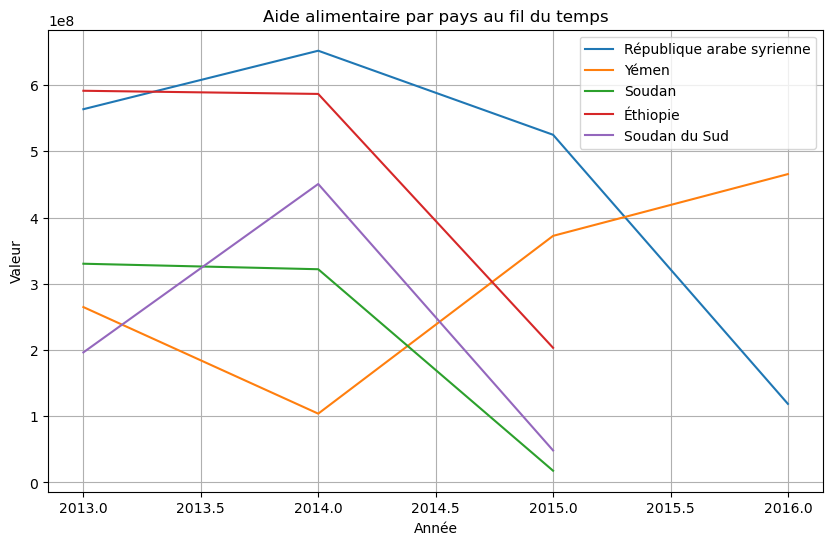

In [53]:
# Créer un graphique linéaire pour chaque pays
plt.figure(figsize=(10, 6))
for pays in liste_pays:
    pays_data = aide_ali_filtrée[aide_ali_filtrée['Zone'] == pays]
    plt.plot(pays_data['Année'], pays_data['Valeur'], label=pays)

plt.xlabel('Année')
plt.ylabel('Valeur')
plt.title('Aide alimentaire par pays au fil du temps')
plt.legend()
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [54]:
#Calcul de la disponibilité en kcal par personne par jour par pays
total_dispo_par_pays = dispo_alimentaire.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()



In [55]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
pays_dispo_moins = total_dispo_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
pays_dispo_moins.head(10)

Zone  \
128                   République centrafricaine   
166                                      Zambie   
91                                   Madagascar   
0                                   Afghanistan   
65                                        Haïti   
133  République populaire démocratique de Corée   
151                                       Tchad   
167                                    Zimbabwe   
114                                     Ouganda   
154                                 Timor-Leste   

     Disponibilité alimentaire (Kcal/personne/jour)  
128                                          1879.0  
166                                          1924.0  
91                                           2056.0  
0                                            2087.0  
65                                           2089.0  
133                                          2093.0  
151                                          2109.0  
167                                          2113.0  
114                                          2126.0  
154                                          2129.0

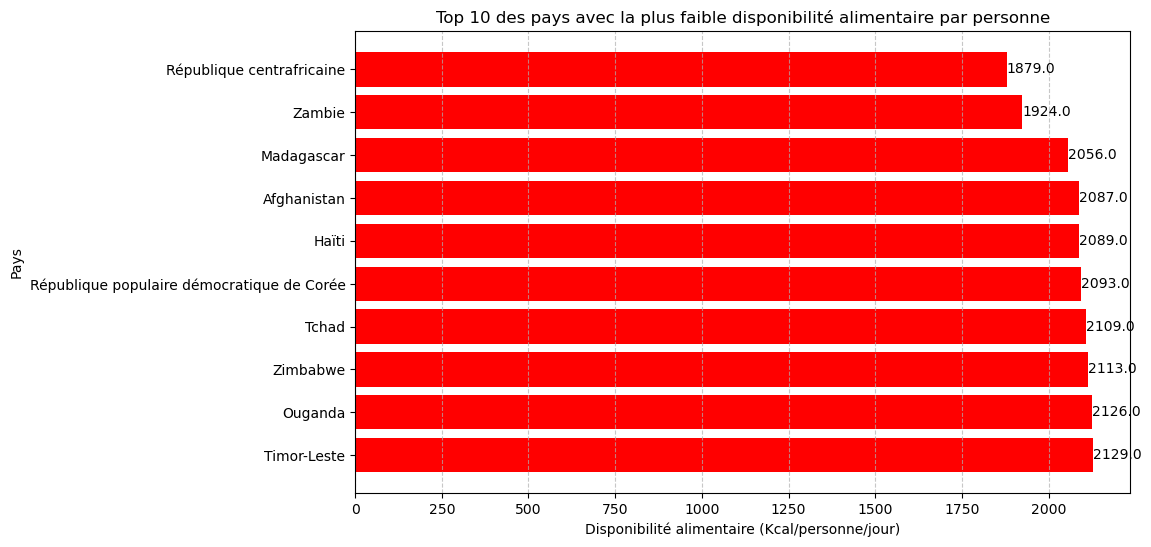

In [56]:
# Graphique:
pays_dispo_moins = total_dispo_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
bottom10_pays_dispo = pays_dispo_moins.head(10)

# Affichage des résultats en graphique
plt.figure(figsize=(10, 6))
plt.barh(bottom10_pays_dispo['Zone'], bottom10_pays_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], color='red')
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylabel('Pays')
plt.title('Top 10 des pays avec la plus faible disponibilité alimentaire par personne')
plt.gca().invert_yaxis()  # Inversion de l'axe Y pour avoir le pays avec la plus faible disponibilité en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajouter des étiquettes de données
for index, value in enumerate(bottom10_pays_dispo['Disponibilité alimentaire (Kcal/personne/jour)']):
    plt.text(value, index, f'{value}', va='center')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [57]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
pays_dispo_moins = total_dispo_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
pays_dispo_moins.head(10)

Zone  Disponibilité alimentaire (Kcal/personne/jour)
11                Autriche                                          3770.0
16                Belgique                                          3737.0
159                Turquie                                          3708.0
171  États-Unis d'Amérique                                          3682.0
74                  Israël                                          3610.0
72                 Irlande                                          3602.0
75                  Italie                                          3578.0
89              Luxembourg                                          3540.0
168                 Égypte                                          3518.0
4                Allemagne                                          3503.0

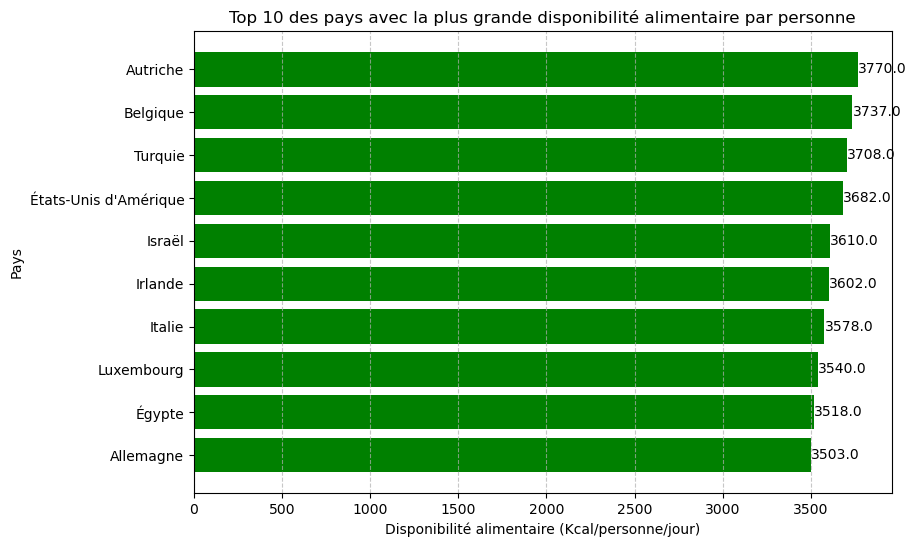

In [58]:
# Graphique:

pays_dispo_moins = total_dispo_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
top10_pays_dispo = pays_dispo_moins.head(10)

# Affichage des résultats en graphique
plt.figure(figsize=(9, 6))
plt.barh(top10_pays_dispo['Zone'], top10_pays_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], color='green')
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylabel('Pays')
plt.title('Top 10 des pays avec la plus grande disponibilité alimentaire par personne')
plt.gca().invert_yaxis()  # Inversion de l'axe Y pour avoir le pays avec la plus grande disponibilité en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajouter des étiquettes de données
for index, value in enumerate(top10_pays_dispo['Disponibilité alimentaire (Kcal/personne/jour)']):
    plt.text(value, index, f'{value}', va='center')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [59]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_Thaïlande = dispo_alimentaire[
    (dispo_alimentaire['Zone'] == 'Thaïlande') & 
    (dispo_alimentaire['Produit'] == 'Manioc')
][['Zone', 'Produit', 'Disponibilité alimentaire (Kcal/personne/jour)']]

dispo_Thaïlande


Zone Produit  Disponibilité alimentaire (Kcal/personne/jour)
13809  Thaïlande  Manioc                                            40.0

In [60]:

sous_nutrition_Thaïlande = population_sous_nutrition_2017[population_sous_nutrition_2017['Zone'] == 'Thaïlande']
sn=sous_nutrition_Thaïlande['sous_nutrition'].values[0]
popthai=sous_nutrition_Thaïlande['Population'].values[0]
sn/popthai*100
print('Le pourcentage sous nutrition- population est de {:.2f} %'.format(sn/popthai*100))

Le pourcentage sous nutrition- population est de 8.96 %


In [61]:
# On calcule la proportion exportée en fonction de la proportion
exportation_Thaïlande = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') &  (dispo_alimentaire['Produit'] == 'Manioc'),:]
exportation_sum = exportation_Thaïlande['Exportations - Quantité'].sum()
exportation_sum
prod_sum = exportation_Thaïlande['Production'].sum()

print('la proportion exportée est de {:.2f} %'.format(exportation_sum *100/prod_sum))

la proportion exportée est de 83.41 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [62]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"